In [1]:
from urllib2 import urlopen
from json import load 
import pandas as pd
import datetime

#buliding URL:

#article for which page views need to be extracted
#look_up="Donald_Trump"
look_up=[ "Donald_Trump","Bernie_Sanders", "Hillary_Clinton","Ted_Cruz","John_Kasich"]


In [87]:

#dates between which page views need to be extracted in the format YYYYMMDD
startdate="20130101"
enddate="20160430"
i=0
for name in look_up:
#request URL : https://wikimedia.org/api/rest_v1/?doc
    url='https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/'+name+'/daily/'+startdate+'/'+enddate

    response = urlopen(url) 

#parses the json response and creates a dictionary with key "list" and value of a  list of dictionaries where each dictionary is a day's page view data
    json_obj = load(response) 

#extacting just the list of dictionaries and creating a data frame
    if i==0:
        data=pd.DataFrame(json_obj['items'])
    else:
        data=pd.concat([data,pd.DataFrame(json_obj['items'])])
    i=i+1
#data cleaning begins

#step 1 : manipulate the timestamp to create a date attribute
data["time2"]=data["timestamp"].str.rstrip('00')
data['time2']=[x + '0' if len(x)<8 else x for x in data['time2']]
data['date']=pd.to_datetime(data["time2"],format="%Y%m%d")

In [88]:
data

,access,agent,article,granularity,project,timestamp,views,time2,date
0,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070100,82159,20150701,2015-07-01
1,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070200,83458,20150702,2015-07-02
2,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070300,55615,20150703,2015-07-03
3,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070400,43865,20150704,2015-07-04
4,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070500,42220,20150705,2015-07-05
5,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070600,38412,20150706,2015-07-06
6,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070700,44158,20150707,2015-07-07
7,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070800,48631,20150708,2015-07-08
8,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070900,83969,20150709,2015-07-09
9,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015071000,59105,20150710,2015-07-10


In [89]:
data_views=pd.DataFrame(data['article'])
data_views['views']=data['views']

In [90]:
PDA_DataViews=data_views.groupby(['article']).count()

In [91]:
PDA_DataViews['mean']=data_views.groupby(['article']).mean()
PDA_DataViews['std']=data_views.groupby(['article']).std()
PDA_DataViews['median']=data_views.groupby(['article']).median()
PDA_DataViews['min']=data_views.groupby(['article']).min()
PDA_DataViews['max']=data_views.groupby(['article']).max()

In [92]:
PDA_DataViews

,views,mean,std,median,min,max
article,,,,,,
Bernie_Sanders,305,48601.416393,49015.837196,34756,9310,488675
Donald_Trump,305,154487.898361,354055.800585,75205,26675,4071156
Hillary_Clinton,305,21724.032787,15859.330724,15435,7135,114790
John_Kasich,305,13071.632787,25664.930995,4946,1239,274379
Ted_Cruz,305,28661.927869,42115.932353,15435,3796,597879


In [93]:
cd=list(data['article'].unique())
cd

[u'Donald_Trump',
 u'Bernie_Sanders',
 u'Hillary_Clinton',
 u'Ted_Cruz',
 u'John_Kasich']

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import datetime as dt

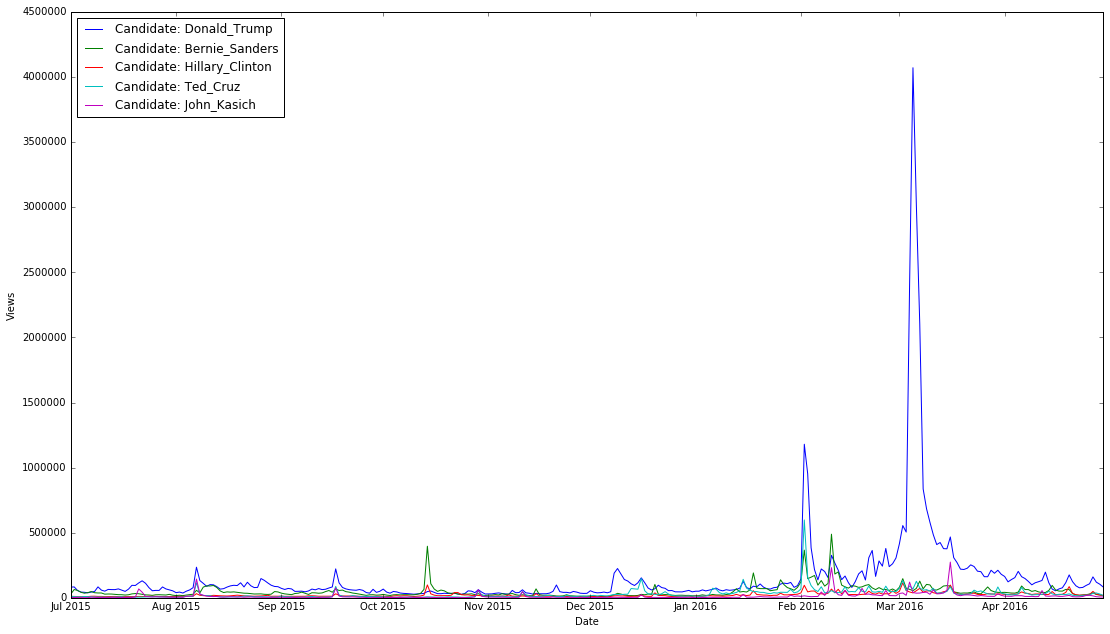

In [98]:
fig,ax = plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True)
data.sort_values(by=['article', 'date'], ascending=[True, True])
for x in cd:
    dat = data[data['article']==x]
    dates =  dat['date']
    ax.plot(dates, dat['views'], label = "Candidate: {0}".format(x))

plt.xlabel("Date")
plt.ylabel("Views")
ax.legend(loc="upper left")
plt.show()